In [ ]:
# Comando para importar los modulos usados en el articulo en Google Colab
# Nota: Para trabajar con Anaconda ejecutar:

# -> python -m venv pykan-env
# -> Para Windows: pykan-env\Scripts\activate
# -> Para Linux: source pykan-env/bin/activate
# -> pip install pykan

!git clone https://github.com/KindXiaoming/pykan
!mv pykan/* .

Cloning into 'pykan'...
remote: Enumerating objects: 2019, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 2019 (delta 251), reused 204 (delta 199), pack-reused 1736
Receiving objects: 100% (2019/2019), 17.33 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (656/656), done.


# 1. Regresión


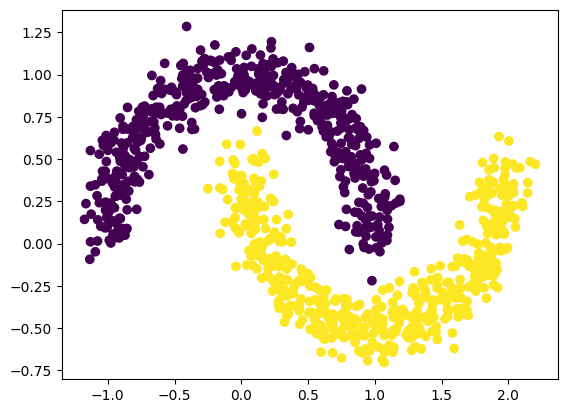

In [ ]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification
import torch
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPRegressor, MLPClassifier

dataset_r = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset_r['train_input'] = torch.from_numpy(train_input)
dataset_r['test_input'] = torch.from_numpy(test_input)
dataset_r['train_label'] = torch.from_numpy(train_label[:,None])
dataset_r['test_label'] = torch.from_numpy(test_label[:,None])

X_train_r = dataset_r['train_input']
y_train_r = dataset_r['train_label']

X_test_r = dataset_r['test_input']
y_test_r = dataset_r['test_label']

# X = X_train
# y = y_train
plt.scatter(X_train_r[:,0], X_train_r[:,1], c=y_train_r[:,0])

### Realizamos un ajuste a los datos usando modelo basado en KAN y otro en MLP. Usamos MSE como función de costo.

## 1.1 MLP

In [ ]:
regresor_mlp = MLPRegressor(hidden_layer_sizes = (2,), random_state=1, max_iter=100, solver='lbfgs').fit(X_train_r, y_train_r)

y_test_hat_r = regresor_mlp.predict(X_test_r)
coef = regresor_mlp.score(X_test_r, y_test_r)
print("Coeficiente R^2:\n",coef)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficiente R^2:
 -0.5492818549133274


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## 1.2 KAN

In [ ]:
model = KAN(width=[2,5,1], grid=3, k=3)

def train_acc_r():
    return torch.mean((torch.round(model(dataset_r['train_input'])[:,0]) == dataset_r['train_label'][:,0]).float())

def test_acc_r():
    return torch.mean((torch.round(model(dataset_r['test_input'])[:,0]) == dataset_r['test_label'][:,0]).float())



# Guardamos los plots de la red construida en cada iteracion para hacer un video
image_folder = 'video_img'

results_r = model.train(dataset_r, opt="LBFGS", steps=21, metrics=(train_acc_r, test_acc_r), save_fig=True,
            in_vars=[r'$x_1$', r'$x_2$'], out_vars=[r'Entrenamiento conjunto Lunas'],
            img_folder=image_folder);
results_r['train_acc_r'][-1], results_r['test_acc_r'][-1]


import os
import numpy as np
import moviepy.video.io.ImageSequenceClip

video_name=f'KAN_{2}_{5}_{1}'
fps=5

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

train loss: 4.59e-02 | test loss: 5.58e-02 | reg: 1.28e+01 : 100%|██| 21/21 [01:56<00:00,  5.55s/it]


Moviepy - Building video KAN_2_5_1.mp4.
Moviepy - Writing video KAN_2_5_1.mp4



Moviepy - Done !
Moviepy - video ready KAN_2_5_1.mp4


In [ ]:
# Regresión simbólica

lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula1 = model.symbolic_formula()[0][0]
print(formula1)

# Accuracy para el modelo simplificado obtenido mediante la regresión simbólica
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('Precision de la formula en train:', acc(formula1, dataset_r['train_input'], dataset_r['train_label']))
print('Precision de la formula en test:', acc(formula1, dataset_r['test_input'], dataset_r['test_label']))

fixing (0,0,0) with sin, r2=0.9975539127129677
fixing (0,0,1) with sin, r2=0.9715451237950956
fixing (0,0,2) with x^3, r2=0.9766018603648374
fixing (0,0,3) with sin, r2=0.99837739784116
fixing (0,0,4) with sin, r2=0.9995388149765841
fixing (0,1,0) with sin, r2=0.9988558387049422
fixing (0,1,1) with tanh, r2=0.9952307563045568
fixing (0,1,2) with tanh, r2=0.9598622792139407
fixing (0,1,3) with x^2, r2=0.8602623552671685
fixing (0,1,4) with x^2, r2=0.9676288431739011
fixing (1,0,0) with sin, r2=0.9894060486977766
fixing (1,1,0) with tanh, r2=0.9412529387461783
fixing (1,2,0) with sin, r2=0.9913722390699378
fixing (1,3,0) with sin, r2=0.9673386979997181
fixing (1,4,0) with tanh, r2=0.9971065752793753
0.5*sin(0.53*(0.3 - x_1)**3 + 1.33*tanh(3.5*x_2 + 0.81) + 2.87) + 0.23*sin(1.33*(0.31 - x_2)**2 - 3.42*sin(1.15*x_1 - 3.99) + 3.66) - 0.4*sin(2.57*sin(1.27*x_1 - 4.01) + 0.85*sin(2.22*x_2 + 1.8) - 6.39) - 0.31*tanh(1.54*(0.47 - x_2)**2 - 3.8*sin(1.04*x_1 - 4.4) + 1.76) - 0.36*tanh(-2.94*sin(2

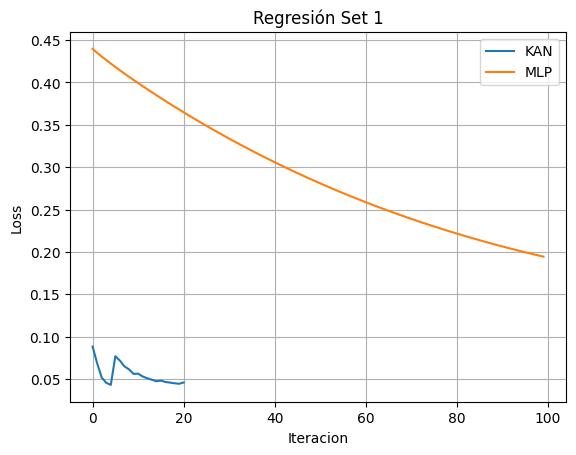

In [ ]:
# Grafica de loss (mse) para ambos métodos

plt.plot(results_r['train_loss'], label ="KAN")
plt.plot(regresor_mlp.loss_curve_, label = "MLP")
plt.title('Regresión Set 1')
plt.xlabel('Iteracion')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# 2. Clasificación

### Realizamos una clasificación usando ambas arquitecturas utilizando como función de costo la cross entropy.

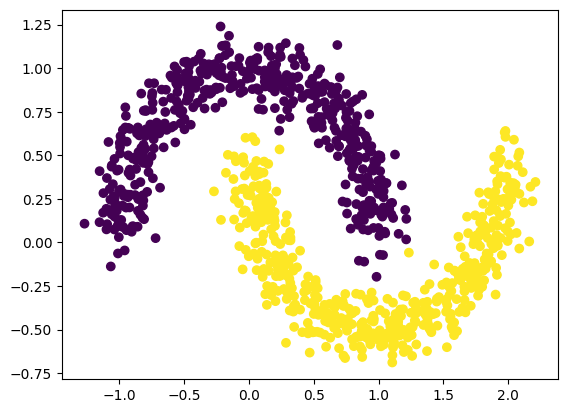

In [ ]:
dataset_c = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset_c['train_input'] = torch.from_numpy(train_input)
dataset_c['test_input'] = torch.from_numpy(test_input)
dataset_c['train_label'] = torch.from_numpy(train_label)
dataset_c['test_label'] = torch.from_numpy(test_label)

X_train_c = dataset_c['train_input']
y_train_c = dataset_c['train_label']

X_test_c = dataset_c['test_input']
y_test_c = dataset_c['test_label']

plt.scatter(X_train_c[:,0], X_train_c[:,1], c=y_train_c[:])


## 2.1 MLP

In [ ]:
clasificador_mlp = MLPClassifier(hidden_layer_sizes=(2,2), activation='relu', solver='lbfgs', alpha=0.0001, batch_size='auto', max_iter=100).fit(X_train_c, y_train_c)

y_test_hat_c = clasificador_mlp.predict(X_test_c)

print(metrics.classification_report(y_test_c, y_test_hat_c))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

## 2.2 KAN

In [ ]:
model = KAN(width=[2,2], grid=3, k=3)

def train_acc_c():
    return torch.mean((torch.argmax(model(dataset_c['train_input']), dim=1) == dataset_c['train_label']).float())

def test_acc_c():
    return torch.mean((torch.argmax(model(dataset_c['test_input']), dim=1) == dataset_c['test_label']).float())

results_c = model.train(dataset_c, opt="LBFGS", steps=100, metrics=(train_acc_c, test_acc_c), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 4.71e-10 | test loss: 2.07e-06 | reg: 3.73e+02 : 100%|█| 100/100 [00:14<00:00,  6.76it/s


In [ ]:
# Regresion simbólica con el modelo simplificado

lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)


formula1_c, formula2_c = model.symbolic_formula()[0]

print("\n")
print(formula1_c)
print("\n")
print(formula2_c)
print("\n")


# how accurate is this formula?
def acc_c(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc_c(formula1_c, formula2_c, dataset_c['train_input'], dataset_c['train_label']))
print('test acc of the formula:', acc_c(formula1_c, formula2_c, dataset_c['test_input'], dataset_c['test_label']))

fixing (0,0,0) with x^3, r2=0.8715612724055847
fixing (0,0,1) with x^3, r2=0.896730625912104
fixing (0,1,0) with log, r2=0.9799455685612316
fixing (0,1,1) with log, r2=0.979852980272016


209.44*(0.52 - x_1)**3 - 545.64*log(10.0 - 6.8*x_2) + 1136.84


-233.24*(0.51 - x_1)**3 + 527.11*log(6.06 - 4.11*x_2) - 829.17


train acc of the formula: tensor(0.9050)
test acc of the formula: tensor(0.8980)


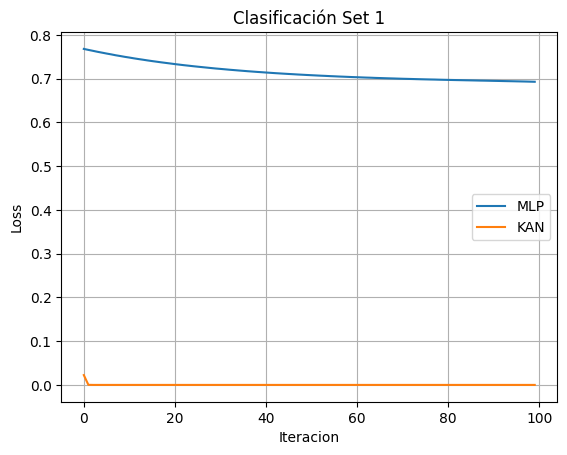

In [ ]:
plt.plot(clasificador_mlp.loss_curve_, label = "MLP")
plt.plot(results_c['test_loss'], label = "KAN")
plt.title('Clasificación Set 1')
plt.xlabel('Iteracion')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# **Pruebas presentadas en el reporte**

# Pruebas de regresión con diferentes arquitecturas para 3 sets diferentes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sympy import lambdify

# Función para realizar el análisis de regresión
def pruebas_regresion(X_train, y_train, X_test, y_test, iter):
    # DefiniMOS los tamaños de capa oculta a testear
    hidden_layer_sizes_list = [(2,), (25,), (50,), (100,)]
    kan_width = [2, 1]

    # Ajustamos las dimensiones de los datos
    X_train = np.hstack((X_train, np.zeros_like(X_train)))
    X_test = np.hstack((X_test, np.zeros_like(X_test)))

    # Ajustamos el dataset en formato de tensor para KAN
    dataset_r = {
        'train_input': torch.from_numpy(X_train).float(),
        'test_input': torch.from_numpy(X_test).float(),
        'train_label': torch.from_numpy(y_train).float(),
        'test_label': torch.from_numpy(y_test).float()
    }

    # Visualización de los datos de entrenamiento
    plt.scatter(X_train[:, 0], y_train, c=y_train, cmap='viridis')
    plt.title(f'Conjunto de datos {iter}')
    plt.show()

    loss_curves = {}

    # Ajuste y evaluación de MLPRegressor para diferentes capas ocultas
    for hidden_layer_sizes in hidden_layer_sizes_list:
        regresor_mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=100)
        regresor_mlp.fit(X_train, y_train.ravel())
        y_test_hat_r = regresor_mlp.predict(X_test)
        coef = regresor_mlp.score(X_test, y_test)
        print(f"Coeficiente R^2 MLPRegressor con {hidden_layer_sizes[0]} neuronas:\n", coef)
        loss_curves[f"MLP {hidden_layer_sizes[0]} neuronas"] = regresor_mlp.loss_curve_

    # Ajuste y evaluación del modelo KAN
    model = KAN(width=kan_width, grid=10, k=3)
    print("Resultados KAN:\n")
    results_r = model.train(dataset_r, opt="LBFGS", steps=100)

    # Regresión simbólica con KAN
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
    formula1 = model.symbolic_formula()[0][0]
    print("Fórmula simbólica obtenida:", formula1)

    # Convertimos la fórmula simbólica a una función numérica
    formula_func = lambdify(['x_1', 'x_2'], formula1)

    # R^2 para fórmula simbólica KAN
    y_pred_r = np.array([formula_func(x[0], x[1]) for x in X_test])
    r2_kan = r2_score(y_test, y_pred_r)
    print("Coeficiente R^2 fórmula KAN:\n", r2_kan)

    loss_curves["KAN"] = results_r['train_loss']


    # Gráfica de la curva ajustada

    plt.figure(figsize=(10, 6))
    plt.plot(X_test, y_pred_r, color='red')
    plt.scatter(X_train[:, 0], y_train, c=y_train, cmap='viridis')

    plt.title(f'Ajuste del modelo {formula1}')
    plt.legend([f'R^2 ={round(r2_kan,2)}'])
    plt.show()


    # Gráfica del MSE para todos los modelos
    plt.figure(figsize=(10, 6))
    for label, loss_curve in loss_curves.items():
        plt.plot(loss_curve, label=label)
    plt.title(f'Regresión Set {iter}')
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida')
    plt.grid()
    plt.legend()
    plt.show()

# Parámetros para los datos generados
n_points = 1000
noise_level = 0.6

# Primer conjunto
x1 = np.linspace(-1, 5, n_points).reshape(-1, 1)
y1 = 1 / (x1 + 1.51234) + 0.1 * np.random.randn(n_points, 1)

# Segundo conjunto
x2 = np.linspace(0, 10, n_points).reshape(-1, 1)
y2 = np.tanh(np.sqrt(x2 + 1)) + 0.01 * noise_level * np.random.randn(n_points, 1)

# Tercer conjunto
x3 = np.linspace(-5, 5, n_points).reshape(-1, 1)
y3 = np.cos(x3) * x3 + 0.3 * np.random.randn(n_points, 1)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=42)

# Ordenamos los datos de prueba para las gráficas
sorted_index1 = np.argsort(X_test1[:, 0])
X_test1 = X_test1[sorted_index1]
y_test1 = y_test1[sorted_index1]

sorted_index2 = np.argsort(X_test2[:, 0])
X_test2 = X_test2[sorted_index2]
y_test2 = y_test2[sorted_index2]

sorted_index3 = np.argsort(X_test3[:, 0])
X_test3 = X_test3[sorted_index3]
y_test3 = y_test3[sorted_index3]

Análisis para el primer conjunto de datos:


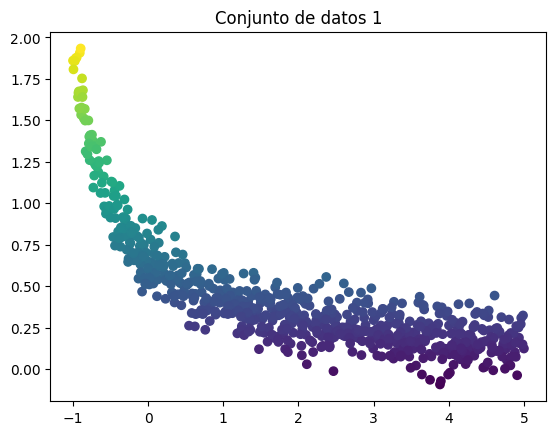

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Coeficiente R^2 MLPRegressor con 2 neuronas:
 -1.0896358919885754
Coeficiente R^2 MLPRegressor con 25 neuronas:
 0.9134514471408057
Coeficiente R^2 MLPRegressor con 50 neuronas:
 0.8997876667197706
Coeficiente R^2 MLPRegressor con 100 neuronas:
 0.8941646065871424
Resultados KAN:



train loss: 1.02e-01 | test loss: 9.42e-02 | reg: 1.18e+00 : 100%|█| 100/100 [00:08<00:00, 11.26it/s


fixing (0,0,0) with exp, r2=0.9854732751846313
fixing (0,1,0) with abs, r2=0.0
Fórmula simbólica obtenida: 0.21 + 0.48*exp(-1.16*x_1)
Coeficiente R^2 fórmula KAN:
 0.9274397723455252


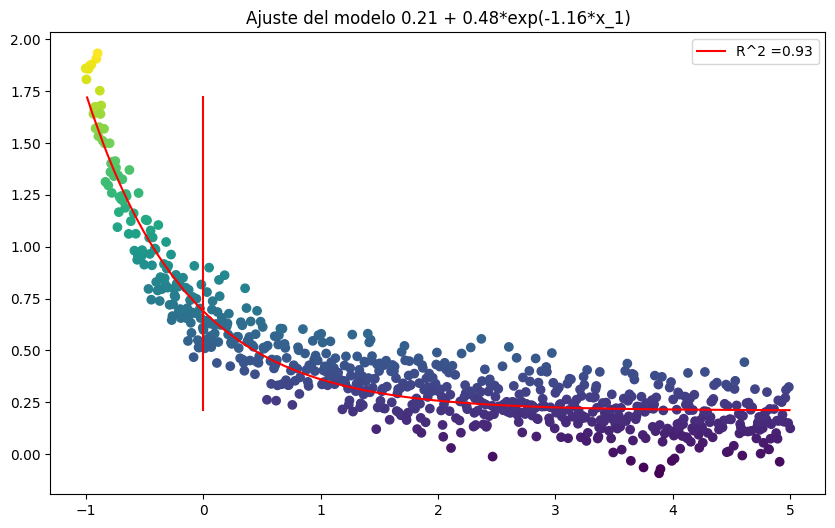

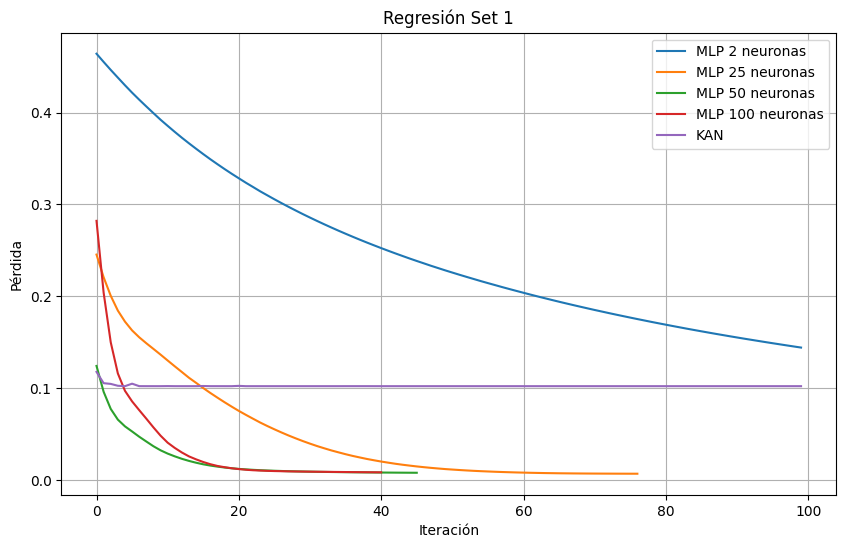

In [ ]:
# Primer prueba
print("Análisis para el primer conjunto de datos:")
pruebas_regresion(X_train1, y_train1, X_test1, y_test1, 1)


Análisis para el segundo conjunto de datos:


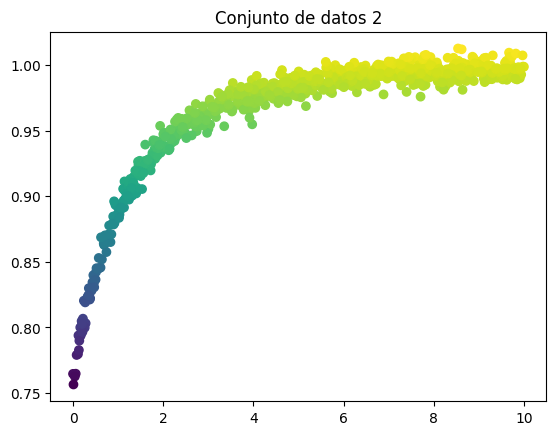

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Coeficiente R^2 MLPRegressor con 2 neuronas:
 -375.7221163384341
Coeficiente R^2 MLPRegressor con 25 neuronas:
 0.5281519707742752
Coeficiente R^2 MLPRegressor con 50 neuronas:
 0.9591298349011917
Coeficiente R^2 MLPRegressor con 100 neuronas:
 0.5208292695413377
Resultados KAN:



train loss: 6.03e-03 | test loss: 6.01e-03 | reg: 4.64e-02 : 100%|█| 100/100 [00:09<00:00, 10.72it/s


fixing (0,0,0) with exp, r2=0.9968629479408264
fixing (0,1,0) with exp, r2=4.4373425918681914e-23
Fórmula simbólica obtenida: 0.99 - 0.22*exp(-0.69*x_1)
Coeficiente R^2 fórmula KAN:
 0.9769348014005371


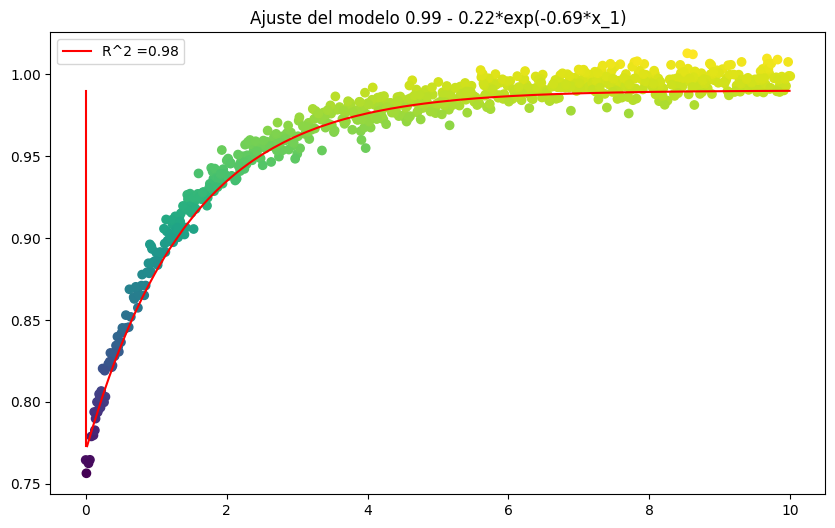

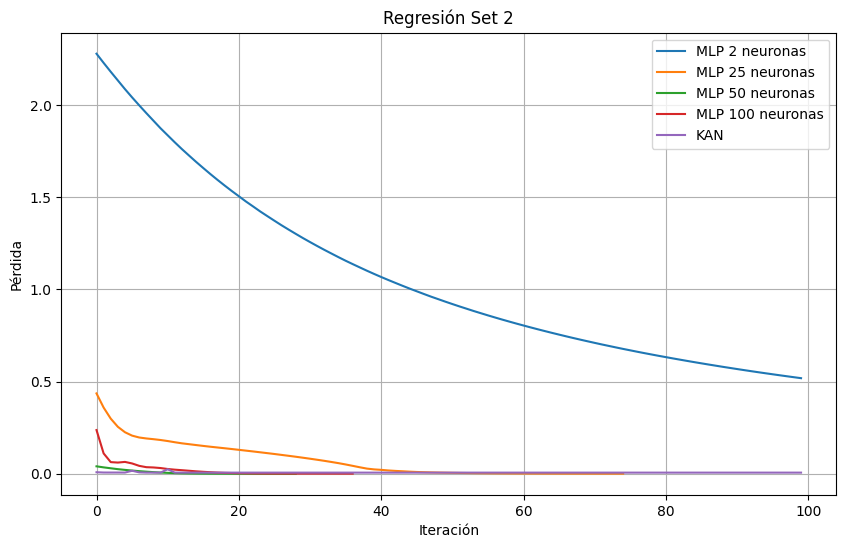

In [ ]:
# Segunda prueba
print("Análisis para el segundo conjunto de datos:")
pruebas_regresion(X_train2, y_train2, X_test2, y_test2, 2)

Análisis para el tercer conjunto de datos:


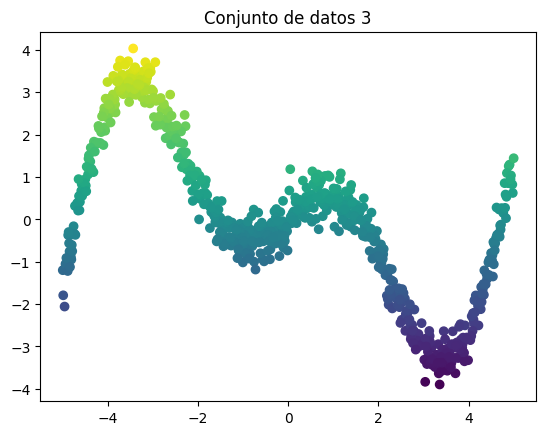

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Coeficiente R^2 MLPRegressor con 2 neuronas:
 0.2815324070484875
Coeficiente R^2 MLPRegressor con 25 neuronas:
 0.5152116557830096


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Coeficiente R^2 MLPRegressor con 50 neuronas:
 0.5417380586538311


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Coeficiente R^2 MLPRegressor con 100 neuronas:
 0.5237036110970796
Resultados KAN:



train loss: 2.93e-01 | test loss: 2.76e-01 | reg: 5.03e-01 : 100%|█| 100/100 [00:06<00:00, 15.99it/s


fixing (0,0,0) with sin, r2=0.6047074794769287
fixing (0,1,0) with abs, r2=0.0
Fórmula simbólica obtenida: 1.76*sin(0.5*x_1 - 3.2) - 0.04
Coeficiente R^2 fórmula KAN:
 0.5917908171405032


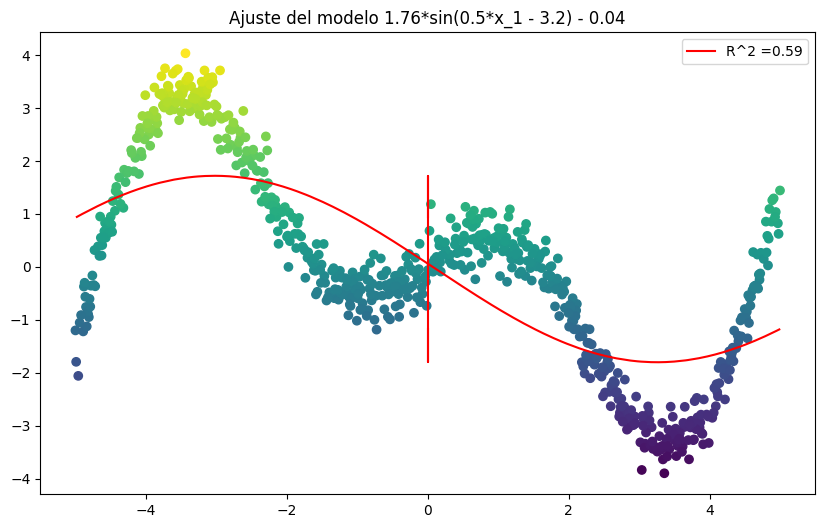

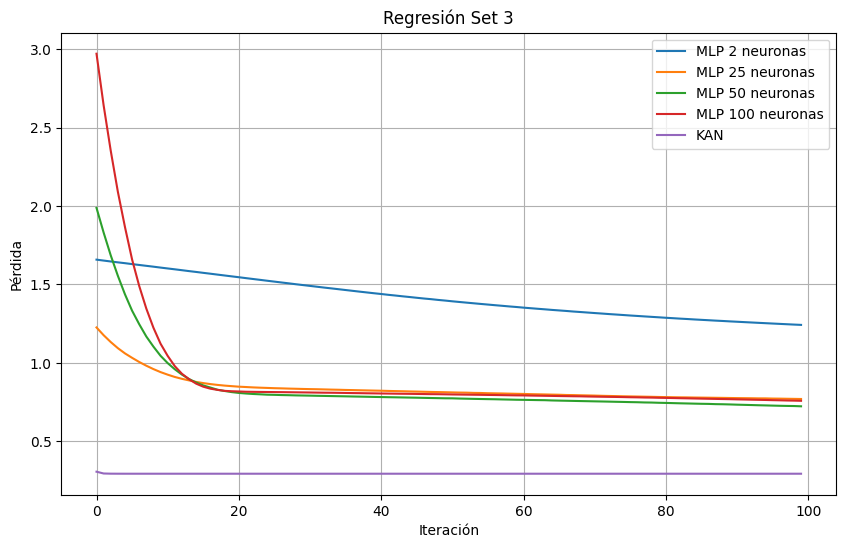

In [ ]:
# Tercer prueba
print("Análisis para el tercer conjunto de datos:")
pruebas_regresion(X_train3, y_train3, X_test3, y_test3, 3)

# Pruebas de clasificación con diferentes arquitecturas para 3 sets diferentes

In [ ]:
# Función para realizar el análisis de clasificación
def pruebas_clasificacion(train_input, train_label, test_input, test_label, iter):
    hidden_layer_sizes_list = [(2,), (25,), (50,), (100,)]
    kan_width = [2, 2]

    dataset_c = {}

    dataset_c['train_input'] = torch.from_numpy(train_input)
    dataset_c['test_input'] = torch.from_numpy(test_input)
    dataset_c['train_label'] = torch.from_numpy(train_label)
    dataset_c['test_label'] = torch.from_numpy(test_label)

    X_train_c = dataset_c['train_input']
    y_train_c = dataset_c['train_label']

    X_test_c = dataset_c['test_input']
    y_test_c = dataset_c['test_label']

    plt.scatter(X_train_c[:,0], X_train_c[:,1], c=y_train_c[:])
    plt.title(f'Conjunto de datos {iter}')
    plt.show()

    loss_curves = {}

    for hidden_layer_sizes in hidden_layer_sizes_list:
        clasificador_mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', max_iter=100)
        clasificador_mlp.fit(X_train_c, y_train_c)

        y_test_hat_c = clasificador_mlp.predict(X_test_c)

        print(f"Accuracy MLP con {hidden_layer_sizes[0]} neuronas:\n", clasificador_mlp.score(X_test_c, y_test_c))
        print(f"Loss MLP con {hidden_layer_sizes[0]} neuronas:\n", clasificador_mlp.loss_)

        loss_curves[f"MLP {hidden_layer_sizes[0]} neuronas"] = clasificador_mlp.loss_curve_

    model = KAN(width=kan_width, grid=10, k=3)

    def train_acc_c():
        return torch.mean((torch.argmax(model(dataset_c['train_input']), dim=1) == dataset_c['train_label']).float())

    def test_acc_c():
        return torch.mean((torch.argmax(model(dataset_c['test_input']), dim=1) == dataset_c['test_label']).float())

    print("Resultados KAN:\n")
    results_c = model.train(dataset_c, opt="LBFGS", steps=100, metrics=(train_acc_c, test_acc_c), loss_fn=torch.nn.CrossEntropyLoss())

    lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
    model.auto_symbolic(lib=lib)

    formula1_c, formula2_c = model.symbolic_formula()[0]

    print("\n")
    print(formula1_c)
    print("\n")
    print(formula2_c)
    print("\n")

    def acc_c(formula1, formula2, X, y):
        batch = X.shape[0]
        correct = 0
        for i in range(batch):
            logit1 = np.array(formula1.subs('x_1', X[i, 0]).subs('x_2', X[i, 1])).astype(np.float64)
            logit2 = np.array(formula2.subs('x_1', X[i, 0]).subs('x_2', X[i, 1])).astype(np.float64)
            correct += (logit2 > logit1) == y[i]
        return correct / batch

    print('Accuracy formula (train):', acc_c(formula1_c, formula2_c, dataset_c['train_input'], dataset_c['train_label']))
    print('Accuracy formula (test):', acc_c(formula1_c, formula2_c, dataset_c['test_input'], dataset_c['test_label']))

    loss_curves["KAN"] = results_c['test_loss']

    plt.figure(figsize=(10, 6))
    for label, loss_curve in loss_curves.items():
        plt.plot(loss_curve, label=label)
    plt.title(f'Clasificación Set {iter}')
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid()
    plt.show()

# Generación de conjuntos de datos

# Lunas
train_input_moons, train_label_moons = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=42)
test_input_moons, test_label_moons = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=24)

# Circulos
train_input_circles, train_label_circles = make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.3, random_state=42)
test_input_circles, test_label_circles = make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.3, random_state=24)

# Blobs
train_input_blobs, train_label_blobs = make_blobs(n_samples=1000, centers=2, random_state=42)
test_input_blobs, test_label_blobs = make_blobs(n_samples=1000, centers=2, random_state=24)

# Conjuntos arbitrarios
train_input_4, train_label_4 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0,
                                                   n_clusters_per_class = 1,flip_y = 0,class_sep = 1,random_state = 25)
test_input_4, test_label_4 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0,
                                                   n_clusters_per_class = 1,flip_y = 0,class_sep = 1,random_state = 5)


Análisis para make_moons:


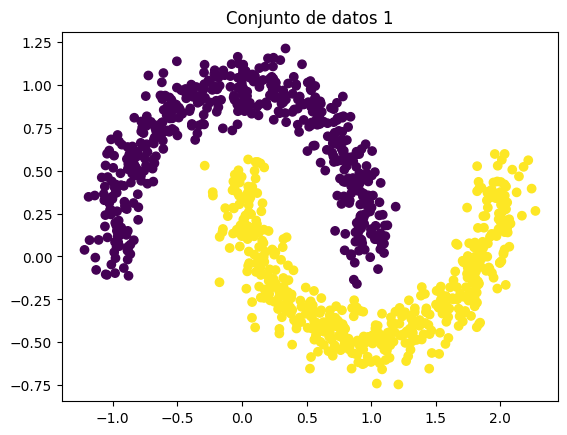

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 2 neuronas:
 0.5
Loss MLP con 2 neuronas:
 0.6329096503068481


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 25 neuronas:
 0.887
Loss MLP con 25 neuronas:
 0.24315311884839327


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 50 neuronas:
 0.905
Loss MLP con 50 neuronas:
 0.2163201945997858


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 100 neuronas:
 0.932
Loss MLP con 100 neuronas:
 0.1609290634414673
Resultados KAN:



train loss: 0.00e+00 | test loss: 1.73e-01 | reg: 6.18e+01 : 100%|█| 100/100 [00:16<00:00,  5.95it/s


fixing (0,0,0) with sin, r2=0.9937026711307794
fixing (0,0,1) with sin, r2=0.9942470959366414
fixing (0,1,0) with abs, r2=0.9070988335075247
fixing (0,1,1) with abs, r2=0.9060729861070351


36.88*sin(3.28*x_1 - 7.85) - 15.45*Abs(7.14*x_2 - 6.93) + 77.72


-36.94*sin(3.29*x_1 - 7.85) + 17.71*Abs(6.15*x_2 - 5.95) - 76.19


Accuracy formula (train): tensor(0.9860)
Accuracy formula (test): tensor(0.9860)


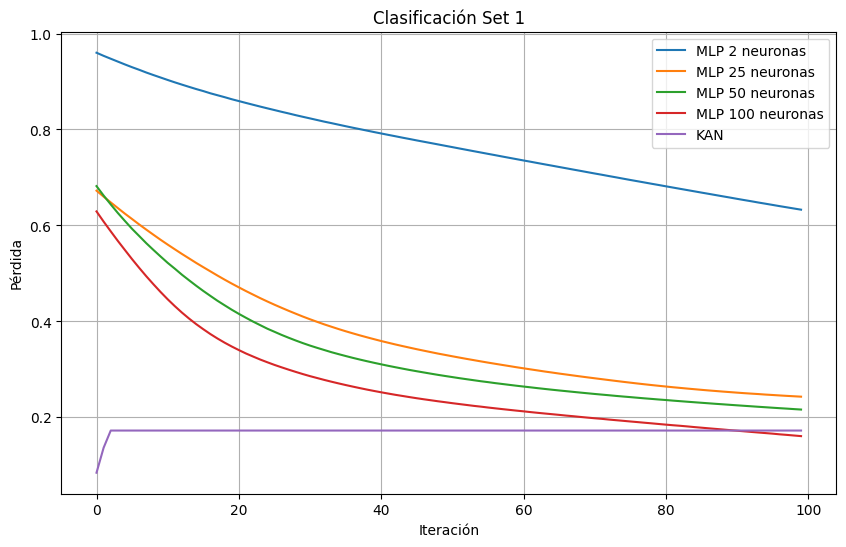

In [ ]:
# Primer prueba
print("Análisis para make_moons:")
pruebas_clasificacion(train_input_moons, train_label_moons, test_input_moons, test_label_moons, 1)

Análisis para make_circles:


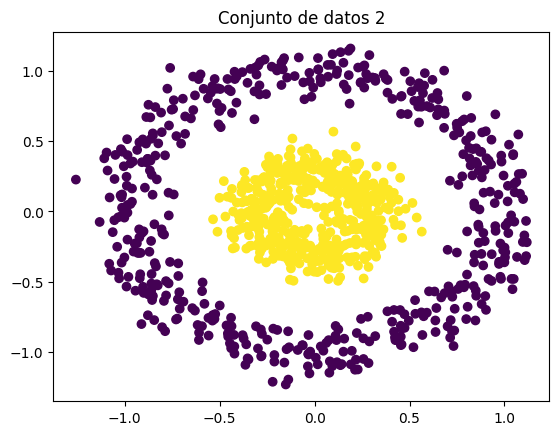

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 2 neuronas:
 0.5
Loss MLP con 2 neuronas:
 0.6043634224442409


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 25 neuronas:
 0.999
Loss MLP con 25 neuronas:
 0.2668717411381963


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 50 neuronas:
 1.0
Loss MLP con 50 neuronas:
 0.1708744143449777


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 100 neuronas:
 1.0
Loss MLP con 100 neuronas:
 0.09922975183133298
Resultados KAN:



train loss: 0.00e+00 | test loss: 1.91e-02 | reg: 5.58e+01 : 100%|█| 100/100 [00:16<00:00,  5.96it/s


fixing (0,0,0) with sin, r2=0.9789396208560456
fixing (0,0,1) with sin, r2=0.9809416695706036
fixing (0,1,0) with sin, r2=0.9858128301523335
fixing (0,1,1) with sin, r2=0.9842813775154013


51.66*sin(2.85*x_1 + 4.61) + 46.04*sin(2.87*x_2 - 1.6) + 31.15


-47.16*sin(2.87*x_1 + 4.6) + 49.88*sin(2.85*x_2 + 7.81) - 30.76


Accuracy formula (train): tensor(1.)
Accuracy formula (test): tensor(1.)


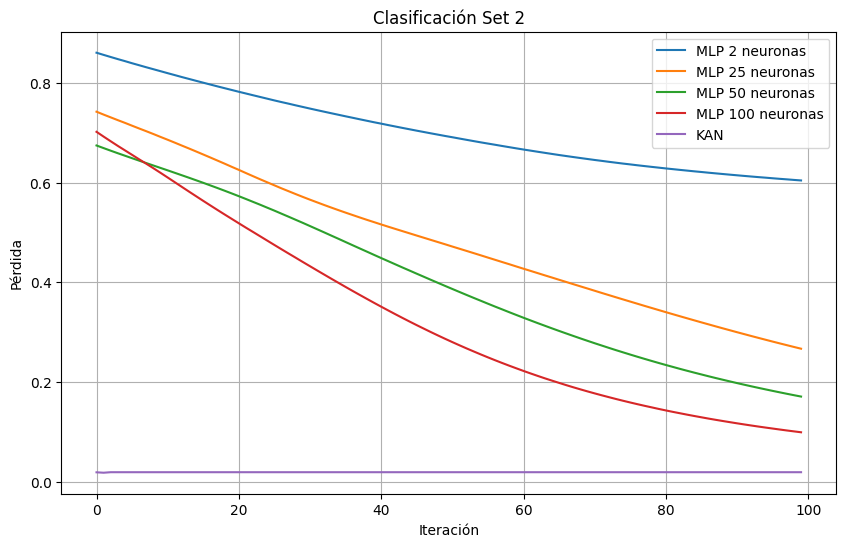

In [ ]:
# Segunda prueba
print("Análisis para make_circles:")
pruebas_clasificacion(train_input_circles, train_label_circles, test_input_circles, test_label_circles, 2)

Análisis para make_blobs:


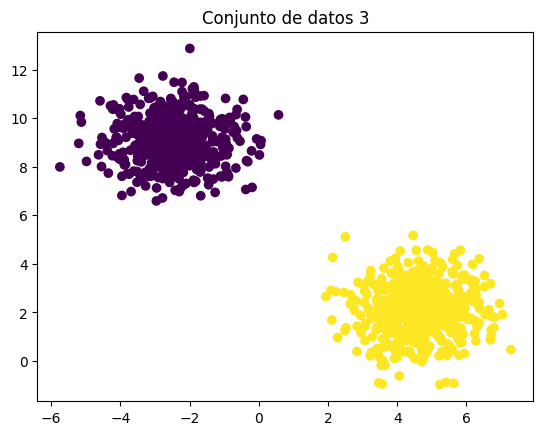

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP con 2 neuronas:
 0.5
Loss MLP con 2 neuronas:
 0.3482567078670584
Accuracy MLP con 25 neuronas:
 0.5
Loss MLP con 25 neuronas:
 0.008528648659013597
Accuracy MLP con 50 neuronas:
 0.5
Loss MLP con 50 neuronas:
 0.001180298150188477
Accuracy MLP con 100 neuronas:
 0.5
Loss MLP con 100 neuronas:
 0.0015213817317324314
Resultados KAN:



train loss: 0.00e+00 | test loss: 6.63e+00 | reg: 7.83e+00 : 100%|█| 100/100 [00:25<00:00,  3.92it/s


fixing (0,0,0) with sqrt, r2=0.9999804725420944
fixing (0,0,1) with sqrt, r2=0.999986863520405
fixing (0,1,0) with tanh, r2=0.9782878278894985
fixing (0,1,1) with tanh, r2=0.9771871252022492


-441.58*sqrt(0.02*x_1 + 1) + 25.5*tanh(0.32*x_2 - 2.46) + 468.18


610.08*sqrt(0.02*x_1 + 1) - 8.14*tanh(0.84*x_2 - 5.0) - 619.65


Accuracy formula (train): tensor(1.)
Accuracy formula (test): tensor(0.5000)


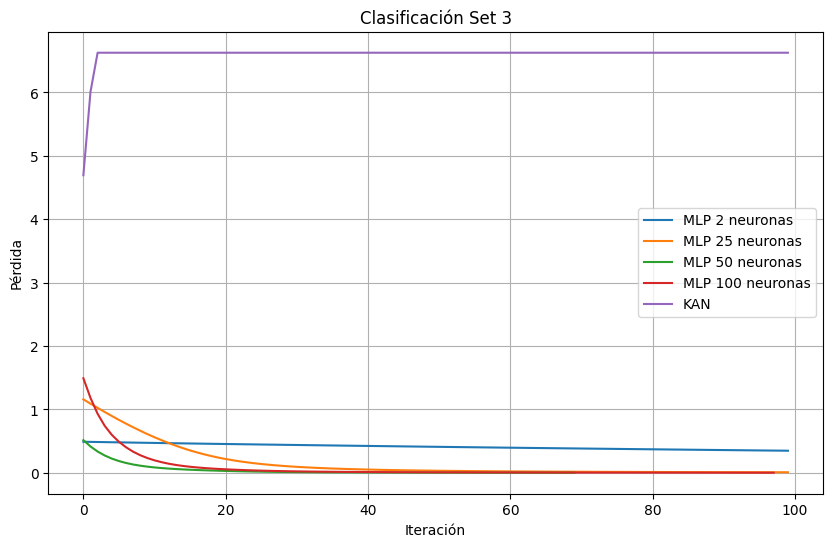

In [ ]:
# Tercer prueba
print("Análisis para make_blobs:")
pruebas_clasificacion(train_input_blobs, train_label_blobs, test_input_blobs, test_label_blobs, 3)

In [ ]:
# print("Análisis para clusters arbitrarios:")
# pruebas_clasificacion(train_input_4, train_label_4, test_input_4, test_label_4, 4)